In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X_2d = iris.data[["petal width (cm)"]].values
X = iris.data.values
y = iris.target_names[iris.target] == 'virginica'

In [7]:
np.random.seed(42)
indices = np.random.permutation(len(X))
print(f"List of indices:\n{indices}")

X_shuffled = X[indices]
y_shuffled = y[indices]

rows, cols = X_shuffled.shape

rows_90 = np.int_(rows * 0.90)

X_train, X_test = X_shuffled[:rows_90,:], X_shuffled[rows_90:, :]
y_train, y_test = y_shuffled[:rows_90], y_shuffled[rows_90:]

List of indices:
[ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80  77  34 114   7  43  70
  98 120  83 134 135  89   8  13 119 125   3  17  38  72 136   6 112 100
   2  63  54 126  50 115  46 139  61 147  79  59  91  41  58  90  48  88
 107 124  21  57 144 129  37 140   1  52 130 103  99 116  87  74 121 149
  20  71 106  14  92 102]


In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (135, 4)
y_train shape: (135,)


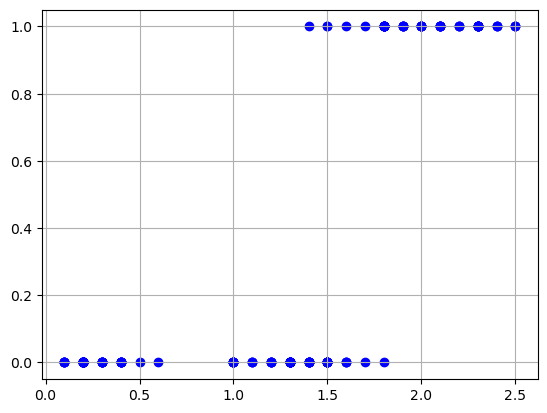

In [9]:
fig, ax = plt.subplots()
ax.scatter(X_2d, y, c="blue")
plt.grid()
plt.show()

In [10]:
class LogisticRegression:
    def __init__(self, epochs=100, lr=0.01, batch_size=32):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.batch_size = batch_size
        self.bias = 0
        
    def fit(self, X, y):
        self.samples, self.features = X.shape
        self.weights = np.random.rand(self.features, 1).astype(np.float32)
        self.bias = np.random.rand(1).astype(np.float32).item()
    
        n = y.shape[0]
        batches = (self.samples + self.batch_size -1) // self.batch_size

        original_X = X.copy()
        original_y = y.copy()
        for epoch in range(self.epochs):
            
            total_loss = 0.0
            total_samples = 0
            
            indices = np.random.permutation(self.samples)
            X_shuffled = original_X[indices]
            y_shuffled = original_y[indices]
            
            for batch in range(batches):
                start = batch * self.batch_size
                end = min((batch + 1) * self.batch_size, self.samples)
                
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                N = X_batch.shape[0] # batch samples
                y_pred = self.predict(X_batch)
                loss = self.loss_function(y_pred, y_batch)
                
                #Gradient descent
                self.weights = self.weights - self.lr/N * np.dot(X_batch.T, (y_pred - y_batch.reshape(-1, 1)))
                self.bias = self.bias - self.lr * np.mean(y_pred -y_batch.reshape(-1,1))
                total_loss += loss
                total_samples += N
            print(f"Epoch: {epoch+1}/{self.epochs} Loss training: {total_loss/total_samples:.4f}")
    
    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model must train before predicting")
        
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict_class(self, X):
        probas = self.predict(X)
        return (probas >= 0.5).astype(int).flatten()
        
    def loss_function(self, y_pred, y_true):
        if y_pred.shape[0] != y_true.shape[0]:
            raise ValueError(f"Predictions and labels must have the same size: {y_pred.shape} != {y_true.shape}")
            
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

In [11]:
log_reg = LogisticRegression(epochs=100, lr=0.01)
log_reg.fit(X_train, y_train)

Epoch: 1/100 Loss training: 0.1283
Epoch: 2/100 Loss training: 0.0871
Epoch: 3/100 Loss training: 0.0534
Epoch: 4/100 Loss training: 0.0361
Epoch: 5/100 Loss training: 0.0284
Epoch: 6/100 Loss training: 0.0259
Epoch: 7/100 Loss training: 0.0255
Epoch: 8/100 Loss training: 0.0256
Epoch: 9/100 Loss training: 0.0254
Epoch: 10/100 Loss training: 0.0253
Epoch: 11/100 Loss training: 0.0236
Epoch: 12/100 Loss training: 0.0254
Epoch: 13/100 Loss training: 0.0253
Epoch: 14/100 Loss training: 0.0248
Epoch: 15/100 Loss training: 0.0252
Epoch: 16/100 Loss training: 0.0245
Epoch: 17/100 Loss training: 0.0237
Epoch: 18/100 Loss training: 0.0259
Epoch: 19/100 Loss training: 0.0253
Epoch: 20/100 Loss training: 0.0254
Epoch: 21/100 Loss training: 0.0260
Epoch: 22/100 Loss training: 0.0256
Epoch: 23/100 Loss training: 0.0257
Epoch: 24/100 Loss training: 0.0258
Epoch: 25/100 Loss training: 0.0269
Epoch: 26/100 Loss training: 0.0264
Epoch: 27/100 Loss training: 0.0257
Epoch: 28/100 Loss training: 0.0263
E

In [12]:
def confusion_matrix(y_pred, y_true):
    """
    Function to compute the confusion matrix, accuracy, recall, and precision.
    
    Parameters:
    y_pred (array-like): Predicted labels.
    y_true (array-like): True labels.
    
    Returns:
    cm (numpy.ndarray): Confusion matrix.
    accuracy (float): Accuracy score.
    recall (float): Recall score.
    precision (float): Precision score.
    """
    if len(y_pred) != len(y_true):
        raise ValueError(f"Predictions and labels have not the same size: {len(y_pred)} != {len(y_true)}")
        
    cm = np.zeros((2,2), dtype=np.float32)
    for i in range(len(y_true)):
        if y_pred[i] == 0 and y_true[i] == 0: # True Negative
            cm[1, 1] += 1
        elif y_pred[i] == 1 and y_true[i] == 1: # True Positive
            cm[0, 0] += 1
        elif y_pred[i] == 0 and y_true[i] == 1: # False Negative
            cm[0, 1] += 1
        elif y_pred[i] == 1 and y_true[i] == 0: # False Positive
            cm[1, 0] += 1

    recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TP / (TP + FN)
    precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])  # TP / (TP + FP)
    accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 0] + cm[1, 1] + cm[0, 1])  # (TP + TN) / (TP + FP + TN + FN)
            
    return cm, accuracy, recall, precision

In [13]:
y_pred_lr = log_reg.predict_class(X_test)

In [14]:
cm, accuracy, recall, precision = confusion_matrix(y_pred_lr, y_test)
print(f"Confusion matrix:\n{cm}\nAccuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Confusion matrix:
[[7. 0.]
 [0. 8.]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


# LogisticRegression from scikit-learn implementation

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
sk_log_reg = LogisticRegression(max_iter=100)
sk_log_reg.fit(X_train, y_train)
y_pred_sk = sk_log_reg.predict(X_test)

In [17]:
cm, accuracy, recall, precision = confusion_matrix(y_pred_sk, y_test)
print(f"Confusion matrix:\n{cm}\nAccuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Confusion matrix:
[[6. 1.]
 [0. 8.]]
Accuracy: 0.9333333373069763
Recall: 0.8571428656578064
Precision: 1.0
